## Generating CLIWOC missing code tables 

The Climatological Database for the World's Oceans 1750-1850 ([CLIWOC](https://stvno.github.io/page/cliwoc/)) has valuable information on its supplemental data stored in the [IMMA](https://icoads.noaa.gov/e-doc/imma/R3.0-imma1.pdf) format under the C99 column. 

We have successfully extracted this information with the [mdf_reader()](https://git.noc.ac.uk/brecinosrivas/mdf_reader) tool, but several important variables are missing their code tables. 

List of variables: 

- Ship types
- latitude indicator
- longitude indicator,
- air temperature units
- sst units
- air pressure units
- units of attached thermometer
- longitude units
- Barometer type

According to the [documentation](https://stvno.github.io/page/cliwoc/) of this deck (730) there are up to 20 different ways of writing down the air pressure but the code tables are not available anymore on the website. Therefore, we extracted from the supplemental data all possible entries for those fields which are missing a code table. We count each entry in order to construct a code table for that particular variable.

The code to extract multiple variables from the CLIWOC supplemental data can be found [here](https://git.noc.ac.uk/brecinosrivas/mdf_reader/-/blob/master/tests/gather_stats_c99.py)


### Set up 

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# PARAMS for plots
from matplotlib import rcParams
sns.set_style("whitegrid")
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 16
rcParams['legend.title_fontsize'] = 16

We stored the statistics per year in python pickle dictionaries.

In [2]:
# Paths to data
dirs = '/Users/brivas/c3s_work/mdf_reader/tests/data/133-730/133-730'
file_names = sorted(os.listdir(dirs))

In [3]:
file_names[0:5]

['1662.pkl', '1663.pkl', '1677.pkl', '1699.pkl', '1745.pkl']

In [4]:
def get_values(dic, key, year):
    """
    Get individual sets of values from the pickle df
    Params:
    ------
    dic: python dictionary containing all variables stats per year
    key: variable name 
    year: year to extract
    Returns:
    --------
    indexes: these are the variable types (e.g. barque or nan)
    series.values: these are the counts of how many that variable name gets repeated
    year: year to sample
    """
    series = dic[key]
    indexes = series.index.values
    year = np.repeat(year, len(indexes))
    return indexes, series.values, year

In [5]:
def exptract_year_arrays(path_to_file, key):
    """
    Reads pickle file and extracts the variable arrays per year
    Parms:
    -----
    path_to_file: path to the pickle file
    key: variable to extract
    Returns:
    --------
    df: dataframe from get_df
    
    """
    with open(path_to_file, 'rb') as handle:
        base = os.path.basename(path_to_file)
        year = os.path.splitext(base)[0]
        dic_pickle = pickle.load(handle)
        df = get_values(dic_pickle, key, year)
        return df

In [6]:
def make_data_frame(list_of_files, main_directory, key):
    
    # Define empty arrays to store the data 
    years=np.array([])
    types_of_var = np.array([])
    counts_var = np.array([])
    
    for file in list_of_files:
        full_path = os.path.join(main_directory, file)
        var_type, count, year_f = exptract_year_arrays(full_path, key)
        years = np.concatenate([years, year_f])
        types_of_var = np.concatenate([types_of_var, var_type])
        counts_var = np.concatenate([counts_var, count])
    
    dataset = pd.DataFrame({'Year': years, 
                            key: types_of_var, 'Count': counts_var})
    
    return dataset

In [7]:
dirs

'/Users/brivas/c3s_work/mdf_reader/tests/data/133-730/133-730'

In [8]:
# List of variables names stored in the pickle files 
dic_keys = ['ship_types', 
            'lan_inds', # in a silly mistake I wrote lat wrong in the output data set. Oh well
            'lon_inds', 
            'at_units', 
            'sst_units', 
            'ap_units', 
            'bart_units', 
            'lon_units', 
            'baro_types']

df_ships = make_data_frame(file_names, dirs, dic_keys[0]).dropna()
df_lati = make_data_frame(file_names, dirs, dic_keys[1]).dropna()
df_loni = make_data_frame(file_names, dirs, dic_keys[2]).dropna()
df_atu = make_data_frame(file_names, dirs, dic_keys[3]).dropna()
df_sstu = make_data_frame(file_names, dirs, dic_keys[4]).dropna()
df_apu = make_data_frame(file_names, dirs, dic_keys[5]).dropna()
df_bartu = make_data_frame(file_names, dirs, dic_keys[6]).dropna()
df_lonu = make_data_frame(file_names, dirs, dic_keys[7]).dropna()
df_barot = make_data_frame(file_names, dirs, dic_keys[8]).dropna()

- Ship types 

In [9]:
types_of_ships = df_ships.ship_types.unique()
types_of_ships

array(['GALJOOT', 'NAVIO', '5TH RATE', '6TH RATE', 'FRIGATE',
       'SHIP O.T. LINE', 'SLOOP', 'FREGAT', '4TH RATE', 'SNOW',
       '3RD RATE', 'FR�GATE', 'FREGATE', 'FREGATTE', '2ND RATE', 'NAV�O',
       'SNAUW', 'BOMB VESSEL, SL', 'OORLOGSSCHIP', 'BOMB/EXPLORATIO',
       'OORLOGSSNAUW', 'SLOOP (?)', 'STORESHIP', 'BRIK', 'PAQUEBOTE',
       'CUTTER', 'FRAGATA', 'FRAGATA CORREO', 'PAQUEBOT', 'BALANDRA',
       'BARK', 'BERGANTIN', 'SLOOP, THREE MA', '6TH RATE FRIGAT',
       'SPIEGELRETOURSC', 'TRANSPORT', 'EXPLORATION VES', 'MERCHANT BRIG',
       'CHAMBEQU�N', 'BUQUE', 'FRAGATA DE GUER', 'FIRESHIP', 'SNAAUW',
       'NAV�O DE LA REA', 'BRIG', 'ADVIJSJAGT', 'KOTTER', '7TH RATE',
       'BRIGANTIJN', '8TH RATE', 'CORVETTE', 'COTTER', 'GABARRE',
       'BRIG/SLOOP', 'PINK', 'BARGENTIJN', 'HOEKERSCHIP', "L'AVISO",
       'FLUTE', 'GOLETA GUARDA C', 'HOEKER', 'CORVETA', 'FLUIT',
       'POLACRA', 'WHALER', 'PAKKETBOOT (BRI', 'ARMED STORESHIP', 'SLOEP',
       'SCHOENER', 'PACKET SHIP',

In [10]:
for t in types_of_ships:
    print(t)

GALJOOT
NAVIO
5TH RATE
6TH RATE
FRIGATE
SHIP O.T. LINE
SLOOP
FREGAT
4TH RATE
SNOW
3RD RATE
FR�GATE
FREGATE
FREGATTE
2ND RATE
NAV�O
SNAUW
BOMB VESSEL, SL
OORLOGSSCHIP
BOMB/EXPLORATIO
OORLOGSSNAUW
SLOOP (?)
STORESHIP
BRIK
PAQUEBOTE
CUTTER
FRAGATA
FRAGATA CORREO
PAQUEBOT
BALANDRA
BARK
BERGANTIN
SLOOP, THREE MA
6TH RATE FRIGAT
SPIEGELRETOURSC
TRANSPORT
EXPLORATION VES
MERCHANT BRIG
CHAMBEQU�N
BUQUE
FRAGATA DE GUER
FIRESHIP
SNAAUW
NAV�O DE LA REA
BRIG
ADVIJSJAGT
KOTTER
7TH RATE
BRIGANTIJN
8TH RATE
CORVETTE
COTTER
GABARRE
BRIG/SLOOP
PINK
BARGENTIJN
HOEKERSCHIP
L'AVISO
FLUTE
GOLETA GUARDA C
HOEKER
CORVETA
FLUIT
POLACRA
WHALER
PAKKETBOOT (BRI
ARMED STORESHIP
SLOEP
SCHOENER
PACKET SHIP
KORVET
STORE SHIP
TROOP SHIP
CORVET
LINIESCHIP
KORVET V OORLOG
BRIK VAN OORLOG
KOOPVAARDER
FREGATSCHIP
STEAMPOWERED WA
TRANSPORTSCHIP
GOLETA
KORVET VAN OORL
BRICK
STEAMER
SCHOENERBRIK
MISTICO
STOOMSCHIP
FALUCHO


- AT units 

In [11]:
df_atu.at_units.unique()

array(['CELSIUS', 'FAHRENHEIT', 'REAMUR', 'REAUMUR'], dtype=object)

- SST units 

In [12]:
df_sstu.sst_units.unique()

array(['FAHRENHEIT'], dtype=object)

- Air pressure units


In [13]:
df_apu.ap_units.unique()

array(['INCHES MERCURY', 'DLS12FRANS', 'DLS100', 'DLS10', 'DLS1004',
       'DLS1204F', 'DLS1200R', 'DLS1204R', 'INCHES MERCURY60', 'DLS1104R',
       'DLS1200', 'DLS12R', 'MILLIMETERS MERCURY', 'RHINE INCHE MERCURY',
       'DLS1004A', 'DLS12', 'DLS1204', 'DLS1004R', 'DLS10R',
       'AMST INCHES MERCURY'], dtype=object)

- Attached thermometer units


In [14]:
df_bartu.bart_units.unique()

array(['FAHRENHEIT'], dtype=object)

- Longitude Units

In [15]:
df_lonu.lon_units.unique()

array(['360 DEGREES', '180 DEGREES', 'UNKNOWN', '180 GRADEN'],
      dtype=object)

- Barometer types:

In [16]:
df_barot.baro_types.unique()

array(['MERCURY', 'SYMPISIOMETER', 'ANEROID'], dtype=object)

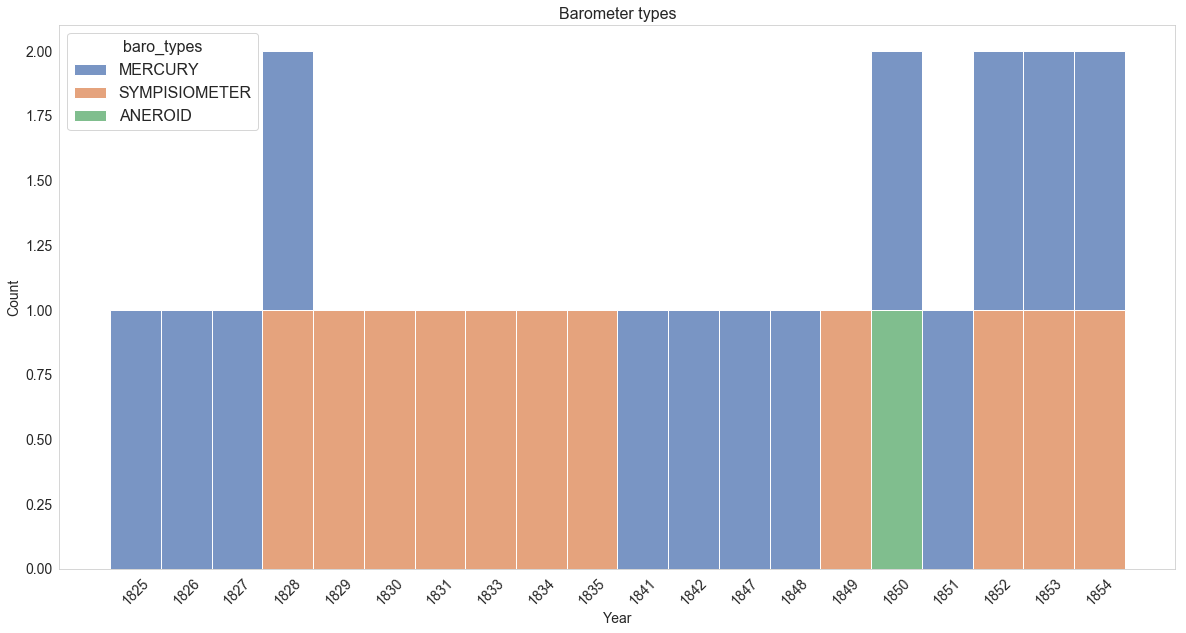

In [17]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

g = sns.histplot(data=df_barot, x="Year", hue="baro_types", 
                 multiple="stack", palette='deep', ax=ax, legend=True)
ax.grid(False)
plt.setp(g.get_xticklabels(), rotation=45)
plt.title('Barometer types', fontsize=16)

plt.show()

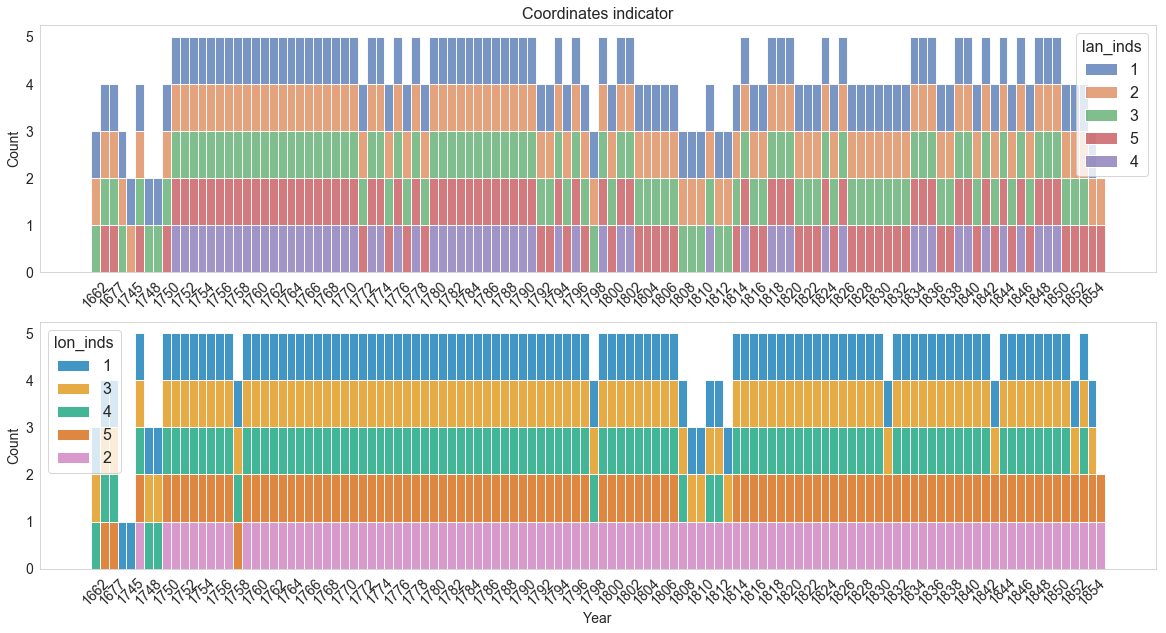

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))


g = sns.histplot(data=df_lati, x="Year", hue="lan_inds", 
                 multiple="stack", palette='deep', ax=ax[0], legend=True)
plt.setp(g.get_xticklabels(), rotation=45)
ax[0].grid(False)

xticks=ax[0].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
        
ax[0].set_title('Coordinates indicator', fontdict={'fontsize': 16, 'fontweight': 'medium'})
ax[0].set_xlabel('')
        

p = sns.histplot(data=df_loni, x="Year", hue="lon_inds", 
                 multiple="stack", palette='colorblind', ax=ax[1], legend=True)
plt.setp(p.get_xticklabels(), rotation=45)
ax[1].grid(False)

xticks=ax[1].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
         
plt.show()

Code table for lat and lon indicators, according to this [information](https://stvno.github.io/page/cliwoc/):

```
{
	"1":"originates from dead reckoning",
	"2":"originates from true navigation (bearing/distance, celestial)",
	"3":"Interpolated manually",
	"4":"Interpolated",
	"5":"Inserted actual position (ports, islands, etc.)",
	"6":"Missing"
}
```

Is it worth using the coordinates from the supplemental metadata or should I use the imma.core lat and lon?